In [63]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

## Homework 3 
##### The CDC Social Vulnerability Index (SVI) takes multiple differen population-level inputs (e.g., % of the population living in poverty, % of the population without health insurance) to identify particularly vulnerable counties. While the CDC SVI scores rely on adding up the percentiles of various characteristics, there are alternative indexes (e.g., [University of South Carolina SoVI index](https://sc.edu/study/colleges_schools/artsandsciences/centers_and_institutes/hvri/data_and_resources/sovi/index.php)) that use methods like PCA.Here, we are going to use the CDC SVI data to create an alternative index based on PCA.

In [64]:
NRI = pd.read_csv('NRI_Table_Counties.csv', dtype={'STCOFIPS': str})
NRI = NRI.fillna(0)

SVI = pd.read_csv('SVI_2022_US_county.csv', dtype={'FIPS':str})
SVI = SVI.fillna(0)

Merge_SVI_NRI = pd.merge(NRI, SVI, left_on='STCOFIPS', right_on='FIPS', how= 'outer')
Merge_SVI_NRI = Merge_SVI_NRI.dropna()

##### The following variables are used in the SVI:
##### `EP_POV150, EP_UNEMP, EP_HBURD, EP_NOHSDP, EP_UNINSUR, EP_AGE65, EP_AGE17, EP_DISABL, EP_SNGPNT, EP_LIMENG, EP_MINRTY, EP_MUNIT, EP_MOBILE, EP_CROWD, EP_NOVEH, EP_GROUPQ, EP_NOINT`

In [65]:
col_for_pca = [
    "EP_POV150", "EP_UNEMP", "EP_HBURD", "EP_NOHSDP", "EP_UNINSUR", 
    "EP_AGE65", "EP_AGE17", "EP_DISABL", "EP_SNGPNT", "EP_LIMENG", 
    "EP_MINRTY", "EP_MUNIT", "EP_MOBILE", "EP_CROWD", "EP_NOVEH", 
    "EP_GROUPQ", "EP_NOINT"
]

Merge_SVI_NRI_pca = Merge_SVI_NRI[col_for_pca]
Merge_SVI_NRI_pca

,EP_POV150,EP_UNEMP,EP_HBURD,EP_NOHSDP,EP_UNINSUR,EP_AGE65,EP_AGE17,EP_DISABL,EP_SNGPNT,EP_LIMENG,EP_MINRTY,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ,EP_NOINT
0,20.2,2.8,19.7,9.6,7.4,15.6,23.4,16.4,5.6,0.4,27.4,3.9,15.6,1.4,4.0,0.9,10.9
1,18.3,3.4,23.2,8.4,9.3,21.2,21.2,13.9,4.2,0.8,17.7,16.6,10.2,1.9,2.3,1.5,10.9
2,37.7,5.8,25.1,23.5,10.7,19.8,20.7,18.1,11.3,2.0,55.4,1.4,29.2,3.8,11.7,12.0,31.8
3,29.0,8.7,23.2,21.1,8.4,16.8,21.2,19.6,7.2,0.3,25.8,2.7,30.6,1.3,7.5,6.4,20.2
4,22.9,6.0,19.4,18.2,10.2,18.3,23.0,17.0,5.3,2.2,14.3,0.9,23.9,2.3,4.8,1.0,16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147,18.0,5.7,18.2,7.0,12.2,13.6,25.5,16.0,5.8,1.0,22.2,5.6,18.8,2.3,2.0,1.2,10.6
3148,10.5,2.1,18.4,4.0,11.9,16.6,17.6,5.7,4.8,2.6,20.3,6.6,3.3,6.0,1.9,3.9,10.4
3149,15.2,3.4,12.6,5.6,10.8,15.6,27.9,16.6,3.4,0.7,13.2,6.7,18.5,3.7,3.7,1.1,8.5
3150,19.1,1.8,22.1,5.3,11.5,23.3,21.9,13.5,2.9,0.4,18.4,1.1,8.0,2.1,4.7,2.0,14.1


##### Note: Typically variables should be standardized to have mean 0 and variance 1 before performing PCA. Most software packages for performing PCA automatically do this or include this as a function argument. Check the function / package documentation to determine whether this standardization is happening and standardize the data if it is not automatic.

In [66]:
standardized = StandardScaler()
standardized_data = standardized.fit_transform(Merge_SVI_NRI_pca)
standardized_df = pd.DataFrame(standardized_data, columns=Merge_SVI_NRI_pca.columns)
standardized_df

,EP_POV150,EP_UNEMP,EP_HBURD,EP_NOHSDP,EP_UNINSUR,EP_AGE65,EP_AGE17,EP_DISABL,EP_SNGPNT,EP_LIMENG,EP_MINRTY,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ,EP_NOINT
0,-0.450258,-0.867588,-0.420795,-0.359297,-0.418388,-0.847754,0.423177,0.044574,-0.055084,-0.449284,0.105205,-0.164877,0.356656,-0.409694,-0.455791,-0.592052,-0.882690
1,-0.676660,-0.625296,0.267873,-0.569016,-0.044475,0.307700,-0.198236,-0.505578,-0.632502,-0.297505,-0.374477,1.972421,-0.219588,-0.196517,-0.839687,-0.453863,-0.882690
2,1.635025,0.343872,0.641721,2.069940,0.231039,0.018836,-0.339466,0.418676,2.295830,0.157830,1.489855,-0.585605,1.807940,0.613555,1.283031,1.964441,2.027562
3,0.598342,1.514949,0.267873,1.650503,-0.221592,-0.600157,-0.198236,0.748767,0.604821,-0.487228,0.026082,-0.366826,1.957337,-0.452329,0.334582,0.674679,0.412303
4,-0.128528,0.424636,-0.479823,1.143684,0.132641,-0.290660,0.310193,0.176610,-0.178817,0.233720,-0.542613,-0.669751,1.242366,-0.025976,-0.275134,-0.569020,-0.047211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,-0.712408,0.303490,-0.715938,-0.813687,0.526233,-1.260416,1.016343,-0.043451,0.027404,-0.221616,-0.151944,0.121218,0.698135,-0.025976,-0.907433,-0.522958,-0.924464
3131,-1.606100,-1.150262,-0.676586,-1.337983,0.467194,-0.641423,-1.215092,-2.310074,-0.385037,0.385498,-0.245902,0.289509,-0.955901,1.551532,-0.930015,0.098892,-0.952313
3132,-1.046053,-0.625296,-1.817806,-1.058358,0.250719,-0.847754,1.694247,0.088586,-0.962455,-0.335450,-0.597010,0.306338,0.666121,0.570919,-0.523537,-0.545989,-1.216881
3133,-0.581333,-1.271408,0.051434,-1.110788,0.388476,0.740995,-0.000514,-0.593602,-1.168675,-0.449284,-0.339861,-0.636092,-0.454355,-0.111246,-0.297716,-0.338706,-0.437101


##### Perform PCA

In [67]:
# Perform PCA
pca = PCA() 
SVI_pca_result = pca.fit_transform(standardized_data)

# Convert to dataframe for better viewing
pca_df = pd.DataFrame(SVI_pca_result)
# print(pca_df)

# See the loadings 
explained_variance_ratio = pca.explained_variance_ratio_
print('Variance_Ratio', explained_variance_ratio)
print('------------------------------')
print('Cumulative Variance Ratio', explained_variance_ratio.cumsum())

# Extract the first three principal components
components = pca.components_[:3] 
variable_names = Merge_SVI_NRI_pca.columns

Variance_Ratio [0.28243036 0.19127826 0.10811736 0.06809839 0.05930915 0.0572498
 0.03648376 0.03431295 0.0295393  0.0263151  0.02462107 0.02142446
 0.01700392 0.01446872 0.01161476 0.00936503 0.00836761]
------------------------------
Cumulative Variance Ratio [0.28243036 0.47370863 0.58182599 0.64992437 0.70923352 0.76648331
 0.80296708 0.83728003 0.86681933 0.89313443 0.9177555  0.93917996
 0.95618388 0.9706526  0.98226736 0.99163239 1.        ]


##### Plot the eigenvectors or loadings associated of the first three principal components. Make sure that the axis labels correspond to the variable names and not the indices of the variables. How would you interpret the first three prinicpal components? Note: you can find the documentation for the SVI variables [here](https://www.atsdr.cdc.gov/placeandhealth/svi/documentation/SVI_documentation_2022.html).

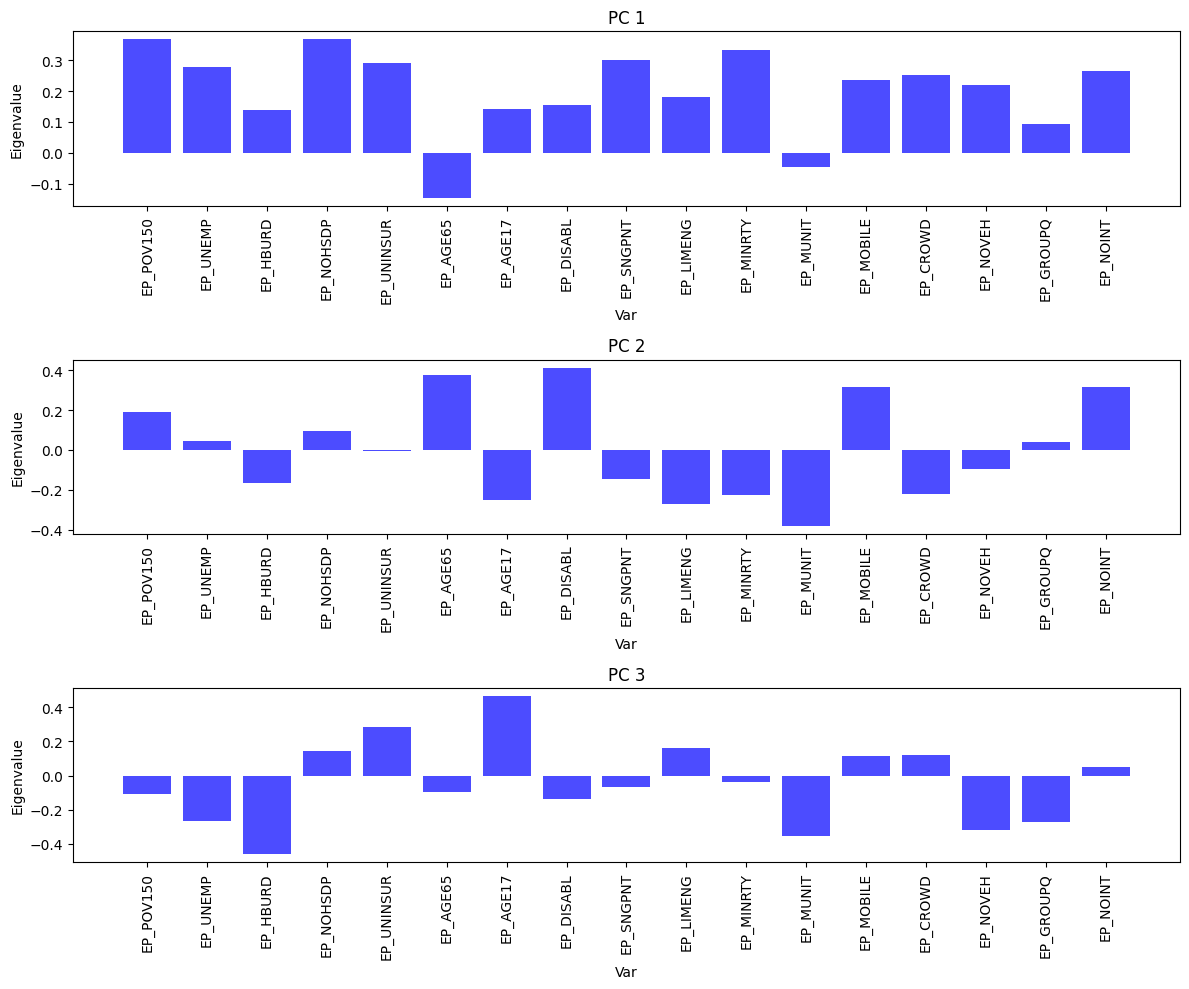

In [68]:
fig, ax = plt.subplots(3, 1, figsize=(12, 10))

for i in range(3):
    ax[i].bar(variable_names, components[i], color='blue', alpha=0.7)
    ax[i].set_title(f'PC {i+1}')
    ax[i].set_xlabel('Var')
    ax[i].set_ylabel('Eigenvalue')
    ax[i].set_xticks(np.arange(len(variable_names)))
    ax[i].set_xticklabels(variable_names, rotation=90)

plt.tight_layout()
plt.show()

##### There are several different ways to determine the number of principal components to retain. One common method is to retain principal components that explain a certain percentage of the variance in the data. a. How many principal components are needed to explain 80% of the variance in the data? b. How many principal components are needed to explain 90% of the variance in the data?

In [69]:
print(explained_variance_ratio.cumsum())
print("--------------------")
print("The result shows that we need at least 7 PCs to explain 80 % of the variation")
print("--------------------")
print("The result shows that we need at least 10 PCs to explain 90 % of the variation")

[0.28243036 0.47370863 0.58182599 0.64992437 0.70923352 0.76648331
 0.80296708 0.83728003 0.86681933 0.89313443 0.9177555  0.93917996
 0.95618388 0.9706526  0.98226736 0.99163239 1.        ]
--------------------
The result shows that we need at least 7 PCs to explain 80 % of the variation
--------------------
The result shows that we need at least 10 PCs to explain 90 % of the variation


##### An alternative approach is to plot the eigenvalues of the principal components and retain the components that are above the "elbow" in the plot. In other words the eigenvalues that are substantially larger than the rest. a. Create a [scree plot](https://en.wikipedia.org/wiki/Scree_plot) of the eigenvalues of the principal components.a. How many principal components should be retained based on the scree plot? This video may help: [PCA Scree Plot](https://youtu.be/vFUvNICWVz4?si=6NbyRcLRGT8L1HzI)

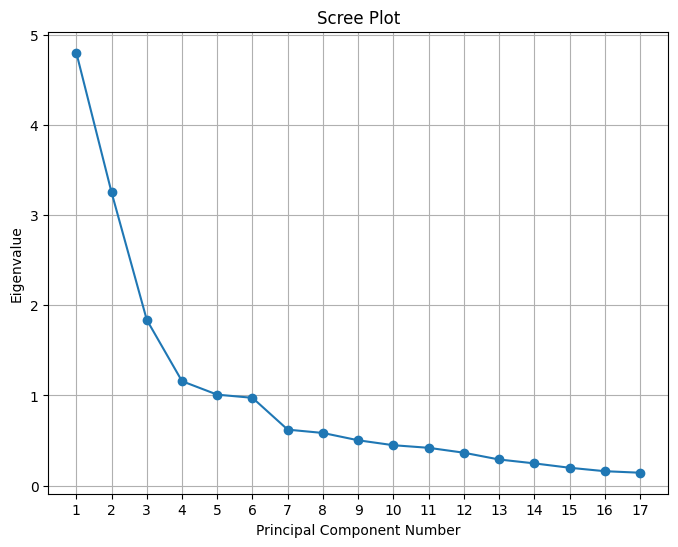

It looks like starting point 7, the drop in component taper off, so I would say we retain 1 to 7


In [70]:
# Call the eigenvalues
eigenvalues = pca.explained_variance_

# Scree plot
plt.figure(figsize=(8,6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker = 'o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component Number')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.xticks(np.arange(1, len(eigenvalues) + 1))
plt.show()

print("It looks like starting point 7, the drop in component taper off, so I would say we retain 1 to 7")

##### cross-validation is another method to determine the number of principal components to retain. This process requires some linear algebra that is beyond the scope of this course. As such, I have written example [code](https://github.com/gabehassler/PRGS-Intro-to-ML-2024/blob/main/examples/pca_cross_validation.jl) in Julia that demonstrates how to perform cross-validation.This procedure is a simplified version of an approach explained in this [blog post](https://alexhwilliams.info/itsneuronalblog/2018/02/26/crossval/). For the purposes of this assignment, the `pca_cv_error` function is a black box that returns the cross-validation error for a given number of principal components. Note: If you use a different programming language, you can use ChatGPT to translate the code to your language of choice. a. Compute the cross-validation error for 1 to 17 principal components. If this process is parallelizable, parallelize the code. If setting a random number seed would make this work more reproducible, set a random number seed. a. How many principal components should be retained based on the cross-validation error?

In [76]:
# This is the functiob for singular value decomposition (This function goes into the pca error function below)
def pca_approx(X, k):
    U, S, Vt = np.linalg.svd(X, full_matrices=False)
    Uk = U[:, :k]
    Sk = np.diag(S[:k])
    Vtk = Vt[:k, :]
    return Uk @ Sk @ Vtk

In [72]:
# This function creates fold matrix (A matrix with random number. For example, if folds = 3, then fold one chooses the element in the fold matrix where the
# values are 1. Ex. we have folds[0,0] = 1, then the original dat matrix X[0,0] = 1.2 will be assigned as missing, then we calculate the row 0's average from the original matrix x, 
# and replace the X[0,0] wiht this average value. Then, the code subtract the original X[0,0] = 1.2 from the new X[0,0] = avegrae and square 
# to get the error for this row (Xhat[0,0] - X[0,0])^2 =  Error for this col. The code then go through the same process for each column and ultimately
# Sum all the Error of each column and get the total Error Fold 1. Fold 2 uses the same logic.

def pca_cv_error(X, k, folds):
    fs = np.unique(folds)

    # Get the mean of each column of X
    means = np.mean(X, axis=0)

    # Initialize the array to store the errors
    errs = np.zeros(len(fs))

    # Loop over the folds
    for idx, f in enumerate(fs):
        # Create a copy of X with the values of fold f replaced by the column means
        X_cv = X.copy()

        # Replace values with column means for fold f
        for i in range(X.shape[1]):
            for j in range(X.shape[0]):
                if folds[j, i] == f:
                    X_cv[j, i] = means[i]

        # Approximate X_cv using the first k principal components
        X_hat = pca_approx(X_cv, k)

        # Compute the error of the approximation for only the replaced values
        err = 0.0
        for i in range(X.shape[1]):
            for j in range(X.shape[0]):
                if folds[j, i] == f:
                    err += (X_hat[j, i] - X[j, i])**2
        errs[idx] = err

    # Return the average error
    return np.sum(errs) / X.size

In [73]:
# Call the data again
Merge_SVI_NRI_pca

# Manually construct the data
X = Merge_SVI_NRI_pca.to_numpy().astype(float)
mu = np.mean(X, axis=0) # Mean
sd = np.std(X, axis=0) # Standard deviation

# Standardize the matrix to center all variables to 0 (Subtracted the mean for each variable from each corresponding variable value)
X = (X - mu) / sd

n_folds = 20 # Set the number of folds. n_folds + 1 set the upper bound of fold number in the fold matrix. Ex, if folds = 20, then the number goes from 1 to 20+1 (not include 21)
folds = np.random.randint(1, n_folds + 1, size=(X.shape[0], X.shape[1]))

##### TODO: compute the cross-validated error of approximating X using the first k principal components for k = 1:17 you should use the pca_cv_error function TODO: what is the optimal number of principal components to use?

In [75]:
# Run the error testing function above and loop through all the k values given by the question.
k_val = range(1, 18)
empty_frame = []

for k in k_val:

    error = pca_cv_error(X,k,folds)
    empty_frame.append(error)

for k, error in zip(k_val, empty_frame):
    print(f"Cross validated error for k = {k}: {error}")

Cross validated error for k = 1: 0.7943164145371636
Cross validated error for k = 2: 0.6555341303155003
Cross validated error for k = 3: 0.6018478067212745
Cross validated error for k = 4: 0.588820077812883
Cross validated error for k = 5: 0.5769997533038592
Cross validated error for k = 6: 0.5491292884183647
Cross validated error for k = 7: 0.563783983595315
Cross validated error for k = 8: 0.5744837103080466
Cross validated error for k = 9: 0.594939684072174
Cross validated error for k = 10: 0.6217822522062988
Cross validated error for k = 11: 0.6554070232437639
Cross validated error for k = 12: 0.6912515677145893
Cross validated error for k = 13: 0.7398746560555542
Cross validated error for k = 14: 0.7939392436364527
Cross validated error for k = 15: 0.8555863369755412
Cross validated error for k = 16: 0.9263528600199927
Cross validated error for k = 17: 1.0000000000000009
